<a href="https://colab.research.google.com/github/maleal2/Neural-Networks-and-Deep-Learning-AAI-511-01-/blob/main/ML_Assignment_3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing dataset to Colab

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing Basic Libraries

In [45]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import math

# Importing Additional Libraries

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Setting for reproducibility

In [112]:
np.random.seed(1234) # Setting for reproducibility
PYTHONASH_SEED = 1234
tf.random.set_seed(PYTHONASH_SEED)

# Loading Dataset.

In [186]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AAI-510.Deep-Learning/Module_3/M3-AAPL.csv') # Importing dataset

In [187]:
# Checking stock_ad distribution
print(data.shape)
data.head()

(1259, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-28,44.730000,45.147499,44.477501,44.557499,43.002316,111792800
1,2019-05-29,44.105000,44.837502,44.000000,44.345001,42.797237,113924800
2,2019-05-30,44.487499,44.807499,44.167500,44.575001,43.019211,84873600
3,2019-05-31,44.057499,44.497501,43.747501,43.767502,42.239895,108174400
4,2019-06-03,43.900002,44.480000,42.567501,43.325001,41.812828,161584400


In [188]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1254,2024-05-20,189.330002,191.919998,189.009995,191.039993,191.039993,44361300
1255,2024-05-21,191.089996,192.729996,190.919998,192.350006,192.350006,42309400
1256,2024-05-22,192.270004,192.820007,190.270004,190.899994,190.899994,34648500
1257,2024-05-23,190.979996,191.000000,186.630005,186.880005,186.880005,51005900
1258,2024-05-24,188.820007,190.580002,188.039993,189.979996,189.979996,36294600


In [189]:
# Converting 'Date' column to datetime format.
data['Date'] = pd.to_datetime(data['Date'])

# Visualizing historical data.

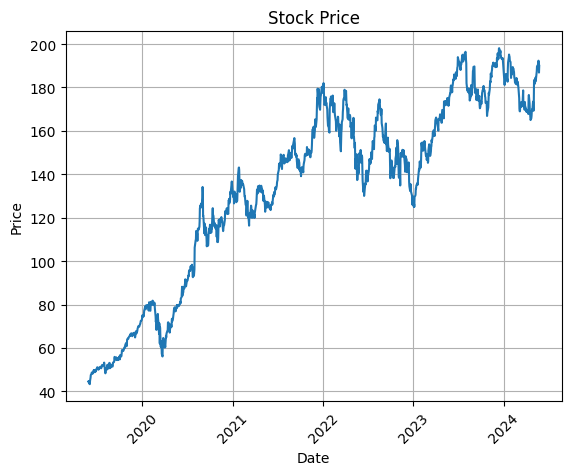

In [190]:
plt.plot(data['Date'], data['Close'])
plt.title('Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Model 1: Predicting the first 30 prices based on three LSTMs layers and three regularization layers; connected by a dense layer as output.

In [191]:
lookback = 30 # Setting the loopback to 30 . This function will help to create a new array for predicting the next future values.
def create_dataset(dataset):
    X, Y = [], []
    for i in range(len(dataset)-lookback-1):
        X.append(dataset[i:(i+lookback), 0])
        Y.append(dataset[i+lookback, 0])
    return np.array(X), np.array(Y)


In [192]:
# Scaling data using MinMax.
data = np.array(data['Close']).reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)


In [193]:
# Splitting the train dataset in 70% and the test dataset in 30%
train_size = int(len(data) * 0.7)
train_data = data[:train_size]
test_data = data[train_size:]
train_X, train_Y = create_dataset(train_data)
test_X, test_Y = create_dataset(test_data)
train_X = np.reshape(train_X, (train_X.shape[0], train_X.shape[1], 1))
test_X = np.reshape(test_X, (test_X.shape[0], test_X.shape[1], 1))


In [194]:
# Printing shapes before training the model
print("Train X shape:", train_X.shape)
print("Train Y shape:", train_Y.shape)
print("Test X shape:", test_X.shape)
print("Test Y shape:", test_Y.shape)

Train X shape: (850, 30, 1)
Train Y shape: (850,)
Test X shape: (347, 30, 1)
Test Y shape: (347,)


In [195]:
model= Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(lookback,1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 30, 50)            10400     
                                                                 
 dropout_13 (Dropout)        (None, 30, 50)            0         
                                                                 
 lstm_15 (LSTM)              (None, 30, 50)            20200     
                                                                 
 dropout_14 (Dropout)        (None, 30, 50)            0         
                                                                 
 lstm_16 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_15 (Dropout)        (None, 50)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                

In [196]:
history= model.fit(train_X, train_Y, epochs=50, batch_size=32, validation_data=(test_X, test_Y)) # Fitting the first model.

Epoch 1/50
27/27 [==============================] - 5s 65ms/step - loss: 0.0636 - val_loss: 0.0018
Epoch 2/50
27/27 [==============================] - 1s 34ms/step - loss: 0.0079 - val_loss: 0.0055
Epoch 3/50
27/27 [==============================] - 1s 34ms/step - loss: 0.0050 - val_loss: 0.0024
Epoch 4/50
27/27 [==============================] - 1s 34ms/step - loss: 0.0047 - val_loss: 0.0038
Epoch 5/50
27/27 [==============================] - 1s 34ms/step - loss: 0.0052 - val_loss: 0.0046
Epoch 6/50
27/27 [==============================] - 1s 34ms/step - loss: 0.0039 - val_loss: 0.0015
Epoch 7/50
27/27 [==============================] - 1s 34ms/step - loss: 0.0041 - val_loss: 0.0025
Epoch 8/50
27/27 [==============================] - 1s 34ms/step - loss: 0.0044 - val_loss: 0.0036
Epoch 9/50
27/27 [==============================] - 1s 34ms/step - loss: 0.0037 - val_loss: 0.0027
Epoch 10/50
27/27 [==============================] - 1s 35ms/step - loss: 0.0044 - val_loss: 0.0023
Epoch 11/

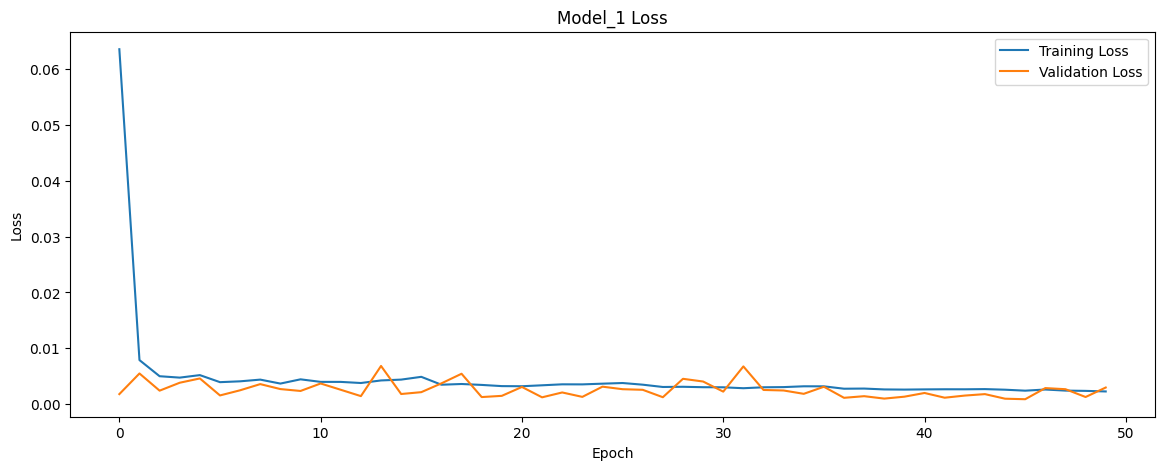

In [220]:
# Visualization of the Training and Validation Loss for the First Model.
plt.figure(figsize=(14, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model_1 Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [198]:
# Reshaping the test data
test_X = test_X.reshape((test_X.shape[0], lookback, 1))

In [199]:
# Making predictions on the test data
predictions = model.predict(test_X)

11/11 [==============================] - 1s 10ms/step


In [200]:
# Converting the predicted values back to their original scale
predictions = scaler.inverse_transform(predictions)


In [201]:
# Converting the actual values back to their original scale
actuals = scaler.inverse_transform(test_Y.reshape(-1, 1))


In [202]:
# Calculating the metrics for the first model.
mae= mean_absolute_error(actuals, predictions)
mse= mean_squared_error(actuals, predictions, squared=False)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", mse)

Mean Absolute Error: 7.388682609163928
Root Mean Squared Error: 8.424961275676068


In [203]:
# Printing the first 30 predicted and actual values
for i in range(30):
    print(f"Predicted: {predictions[i][0]:.2f} Actual: {actuals[i][0]:.2f}")

Predicted: 127.66 Actual: 129.62
Predicted: 127.08 Actual: 130.15
Predicted: 126.78 Actual: 130.73
Predicted: 126.78 Actual: 133.49
Predicted: 127.11 Actual: 133.41
Predicted: 127.73 Actual: 134.76
Predicted: 128.56 Actual: 135.94
Predicted: 129.57 Actual: 135.21
Predicted: 130.63 Actual: 135.27
Predicted: 131.65 Actual: 137.87
Predicted: 132.65 Actual: 141.11
Predicted: 133.73 Actual: 142.53
Predicted: 134.91 Actual: 141.86
Predicted: 136.11 Actual: 143.96
Predicted: 137.33 Actual: 145.93
Predicted: 138.58 Actual: 143.00
Predicted: 139.71 Actual: 144.29
Predicted: 140.69 Actual: 145.43
Predicted: 141.54 Actual: 150.82
Predicted: 142.45 Actual: 154.50
Predicted: 143.57 Actual: 151.73
Predicted: 144.78 Actual: 154.65
Predicted: 146.08 Actual: 151.92
Predicted: 147.28 Actual: 150.87
Predicted: 148.26 Actual: 151.01
Predicted: 148.96 Actual: 153.85
Predicted: 149.51 Actual: 153.20
Predicted: 149.92 Actual: 155.33
Predicted: 150.30 Actual: 153.71
Predicted: 150.61 Actual: 152.55


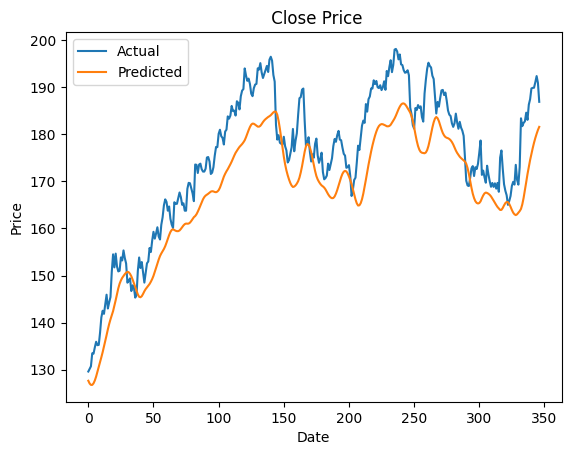

In [204]:
plt.plot(actuals, label='Actual') # Plottomg the close price for the first Model.
plt.plot(predictions, label='Predicted')
plt.title(' Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Model 2: Predicting the first 30 prices based on two LSTMs layers and two regularization layers; connected by a dense layer as output.

In [205]:
# Model 2 , using only two LSTMs and regularization layers
model_2= Sequential()
model_2.add(LSTM(units=50, return_sequences=True, input_shape=(lookback,1)))
model_2.add(Dropout(0.2))
model_2.add(LSTM(units=50))
model_2.add(Dropout(0.2))
model_2.add(Dense(units=1))
model_2.compile(optimizer='adam', loss='mean_squared_error')
model_2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_17 (LSTM)              (None, 30, 50)            10400     
                                                                 
 dropout_16 (Dropout)        (None, 30, 50)            0         
                                                                 
 lstm_18 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_17 (Dropout)        (None, 50)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 51        
                                                                 
Total params: 30651 (119.73 KB)
Trainable params: 30651 (119.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [207]:
history_2= model_2.fit(train_X, train_Y, epochs=50, batch_size=32, validation_data=(test_X, test_Y)) # Fitting the second model.

Epoch 1/50
27/27 [==============================] - 4s 48ms/step - loss: 0.0322 - val_loss: 0.0016
Epoch 2/50
27/27 [==============================] - 1s 23ms/step - loss: 0.0054 - val_loss: 0.0029
Epoch 3/50
27/27 [==============================] - 1s 23ms/step - loss: 0.0041 - val_loss: 0.0011
Epoch 4/50
27/27 [==============================] - 1s 24ms/step - loss: 0.0037 - val_loss: 0.0015
Epoch 5/50
27/27 [==============================] - 1s 24ms/step - loss: 0.0037 - val_loss: 0.0030
Epoch 6/50
27/27 [==============================] - 1s 24ms/step - loss: 0.0037 - val_loss: 0.0013
Epoch 7/50
27/27 [==============================] - 1s 23ms/step - loss: 0.0033 - val_loss: 0.0011
Epoch 8/50
27/27 [==============================] - 1s 24ms/step - loss: 0.0032 - val_loss: 0.0019
Epoch 9/50
27/27 [==============================] - 1s 25ms/step - loss: 0.0036 - val_loss: 0.0028
Epoch 10/50
27/27 [==============================] - 1s 23ms/step - loss: 0.0034 - val_loss: 0.0014
Epoch 11/

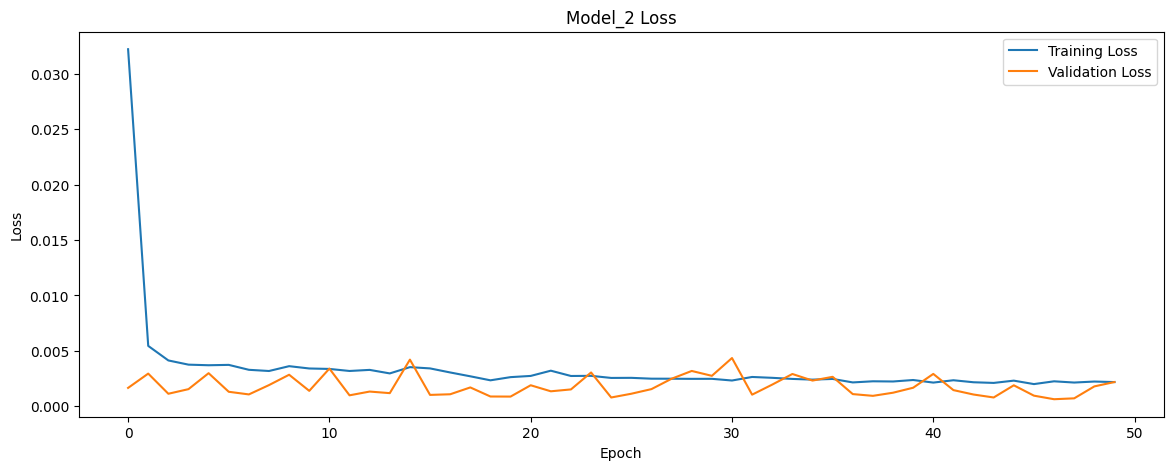

In [221]:
# Visualization of the Training and Validation Loss for Model_2
plt.figure(figsize=(14, 5))
plt.plot(history_2.history['loss'], label='Training Loss')
plt.plot(history_2.history['val_loss'], label='Validation Loss')
plt.title('Model_2 Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [210]:
test_X = test_X.reshape((test_X.shape[0], lookback, 1))

# Making predictions on the test data for Model 2
predictions = model_2.predict(test_X)

# Converting the predicted values back to their original scale
predictions = scaler.inverse_transform(predictions)

# Converting the actual values back to their original scale
actuals = scaler.inverse_transform(test_Y.reshape(-1, 1))

mae= mean_absolute_error(actuals, predictions)
mse= mean_squared_error(actuals, predictions, squared=False)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", mse)


11/11 [==============================] - 1s 6ms/step
Mean Absolute Error: 6.347581057268215
Root Mean Squared Error: 7.218134034636728


In [211]:
# Printing the first 30 predicted and actual values based on Model 2
for i in range(30):
    print(f"Predicted: {predictions[i][0]:.2f} Actual: {actuals[i][0]:.2f}")

Predicted: 126.51 Actual: 129.62
Predicted: 126.34 Actual: 130.15
Predicted: 126.57 Actual: 130.73
Predicted: 127.06 Actual: 133.49
Predicted: 127.96 Actual: 133.41
Predicted: 128.98 Actual: 134.76
Predicted: 130.10 Actual: 135.94
Predicted: 131.28 Actual: 135.21
Predicted: 132.27 Actual: 135.27
Predicted: 133.06 Actual: 137.87
Predicted: 133.93 Actual: 141.11
Predicted: 135.09 Actual: 142.53
Predicted: 136.41 Actual: 141.86
Predicted: 137.61 Actual: 143.96
Predicted: 138.83 Actual: 145.93
Predicted: 140.13 Actual: 143.00
Predicted: 140.99 Actual: 144.29
Predicted: 141.65 Actual: 145.43
Predicted: 142.25 Actual: 150.82
Predicted: 143.33 Actual: 154.50
Predicted: 144.94 Actual: 151.73
Predicted: 146.33 Actual: 154.65
Predicted: 147.79 Actual: 151.92
Predicted: 148.79 Actual: 150.87
Predicted: 149.31 Actual: 151.01
Predicted: 149.51 Actual: 153.85
Predicted: 149.82 Actual: 153.20
Predicted: 150.06 Actual: 155.33
Predicted: 150.48 Actual: 153.71
Predicted: 150.75 Actual: 152.55


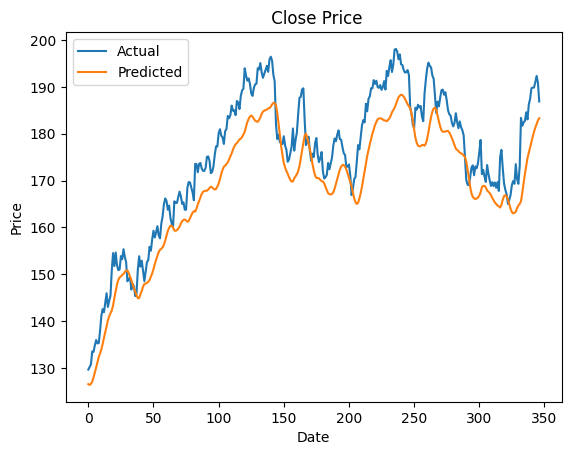

In [212]:
plt.plot(actuals, label='Actual') # Visualizing the close price for Model_2
plt.plot(predictions, label='Predicted')
plt.title(' Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Model 3: Predicting the first 30 prices based on two LSTMs layers connected by a dense layer as output.

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_22 (LSTM)              (None, 30, 50)            10400     
                                                                 
 lstm_23 (LSTM)              (None, 50)                20200     
                                                                 
 dense_12 (Dense)            (None, 1)                 51        
                                                                 
Total params: 30651 (119.73 KB)
Trainable params: 30651 (119.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
27/27 [==============================] - 4s 46ms/step - loss: 0.0538 - val_loss: 0.0128
Epoch 2/50
27/27 [==============================] - 1s 24ms/step - loss: 0.0027 - val_loss: 0.0017
Epoch 3/50
27/27 [==============================] - 1s 25ms/step - loss: 0.0014 -

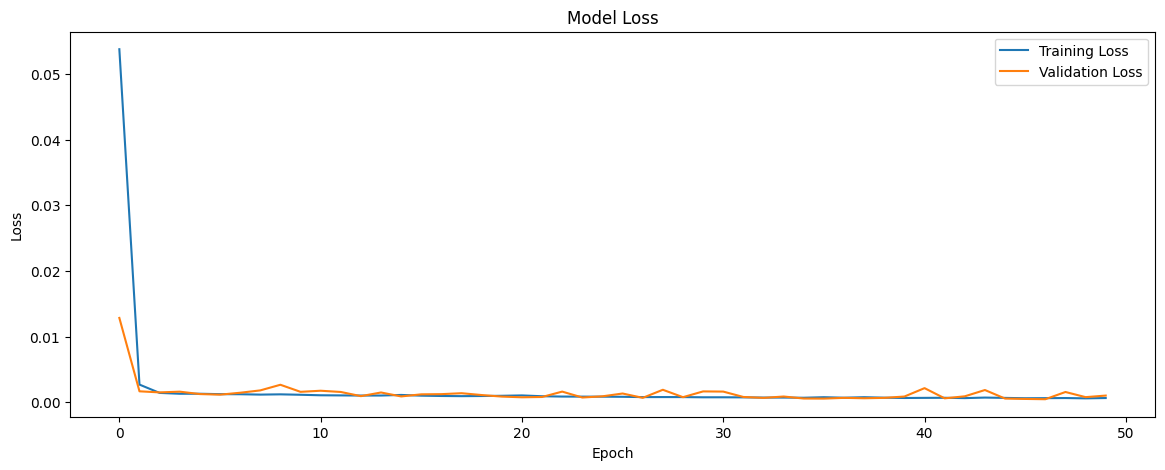

In [216]:
# Model 3 , using two LSTM layer without regularization
model_3= Sequential()
model_3.add(LSTM(units=50, return_sequences=True, input_shape=(lookback,1)))
model_3.add(LSTM(units=50))
model_3.add(Dense(units=1))
model_3.compile(optimizer='adam', loss='mean_squared_error')
model_3.summary()

# Fitting training and testing data to the model 3
history_3= model_3.fit(train_X, train_Y, epochs=50, batch_size=32, validation_data=(test_X, test_Y))

# Visualization of the Training and Validation Loss for Model_3
plt.figure(figsize=(14, 5))
plt.plot(history_3.history['loss'], label='Training Loss')
plt.plot(history_3.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [217]:
# Reshaping the test data
test_X = test_X.reshape((test_X.shape[0], lookback, 1))

# Making predictions on the test data for Model 3
predictions = model_3.predict(test_X)

# Converting the predicted values back to their original scale
predictions = scaler.inverse_transform(predictions)

# Converting the actual values back to their original scale
actuals = scaler.inverse_transform(test_Y.reshape(-1, 1))

mae= mean_absolute_error(actuals, predictions)
mse= mean_squared_error(actuals, predictions, squared=False)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", mse)

11/11 [==============================] - 1s 8ms/step
Mean Absolute Error: 4.226689192999144
Root Mean Squared Error: 4.946983104257285


In [218]:
# Printing the first 30 predicted and actual values based on Model 3
for i in range(30):
    print(f"Predicted: {predictions[i][0]:.2f} Actual: {actuals[i][0]:.2f}")

Predicted: 126.65 Actual: 129.62
Predicted: 126.76 Actual: 130.15
Predicted: 127.36 Actual: 130.73
Predicted: 128.24 Actual: 133.49
Predicted: 129.59 Actual: 133.41
Predicted: 130.96 Actual: 134.76
Predicted: 132.35 Actual: 135.94
Predicted: 133.70 Actual: 135.21
Predicted: 134.67 Actual: 135.27
Predicted: 135.26 Actual: 137.87
Predicted: 135.97 Actual: 141.11
Predicted: 137.13 Actual: 142.53
Predicted: 138.57 Actual: 141.86
Predicted: 139.78 Actual: 143.96
Predicted: 141.04 Actual: 145.93
Predicted: 142.42 Actual: 143.00
Predicted: 143.09 Actual: 144.29
Predicted: 143.50 Actual: 145.43
Predicted: 143.87 Actual: 150.82
Predicted: 145.07 Actual: 154.50
Predicted: 147.12 Actual: 151.73
Predicted: 148.79 Actual: 154.65
Predicted: 150.51 Actual: 151.92
Predicted: 151.44 Actual: 150.87
Predicted: 151.58 Actual: 151.01
Predicted: 151.28 Actual: 153.85
Predicted: 151.28 Actual: 153.20
Predicted: 151.28 Actual: 155.33
Predicted: 151.68 Actual: 153.71
Predicted: 151.92 Actual: 152.55


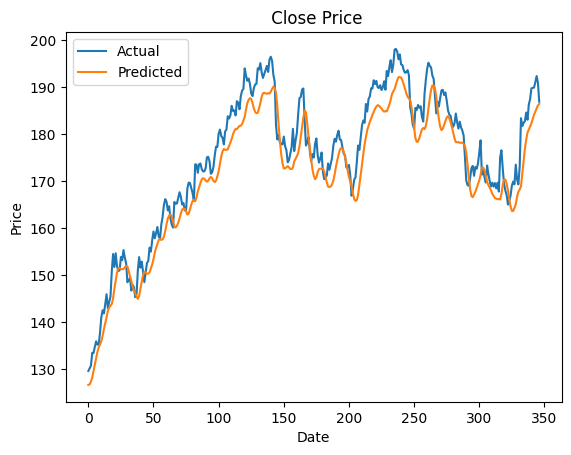

In [219]:
plt.plot(actuals, label='Actual') # Dispalying the Close Price for Model 3
plt.plot(predictions, label='Predicted')
plt.title(' Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Conclusions

- I have evaluated three LSTM models for predicting the next 30 stock prices based on historical data. The following results were obtained:

**First Model**:

**Architecture**: The model consisted of three LSTM layers with dropout regularization followed by a dense output layer.

**Performance Metrics**:
  - Mean Absolute Error (MAE): 7.39
  - Root Mean Squared Error (RMSE): 8.42

**Example Predictions vs Actual**:

- Predicted: 127.66 Actual: 129.62
- Predicted: 127.08 Actual: 130.15
- Predicted: 150.61 Actual: 152.55

**Second Model**:

**Architecture**: Similar to the first model but with fewer parameters.This time reducing one LSTM layer and one regularization layer.

**Performance Metrics**:
  - Mean Absolute Error (MAE): 6.35
  - Root Mean Squared Error (RMSE): 7.22

**Example Predictions vs Actual**:

- Predicted: 126.51 Actual: 129.62
- Predicted: 126.34 Actual: 130.15
- Predicted: 150.75 Actual: 152.55

**Third Model**:

**Architecture**: Simplified to two LSTM layers and a dense output layer.

**Performance Metrics**:
 - Mean Absolute Error (MAE): 4.23
 - Root Mean Squared Error (RMSE): 4.95

**Example Predictions vs Actual**:

- Predicted: 126.65 Actual: 129.62
- Predicted: 126.76 Actual: 130.15
- Predicted: 151.92 Actual: 152.55

**Observations**

- The third model outperformed the others in terms of both MAE and RMSE, indicating its superior predictive accuracy.
- While the first model had more parameters and layers, it did not necessarily translate to better performance compared to the simpler architectures of the second and third models.
- All models generally captured the trend of stock price movements, but the third model showed the least deviation from actual prices.

**Recommendations**

- Based on these results, Model 3 appears to be the most suitable for predicting future stock prices due to its lower prediction errors. Further refinement could involve tuning hyperparameters such as the number of LSTM units, dropout rates, and learning rate to potentially enhance performance even further.